In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

## User input

In [2]:
filename = 'E:\\Ashlee\\PacBio\\181207\\blank\\m181207_203634_42131_c000468672559900001500000112312090_s1_p0.trc.h5'
frame_rate = 0.1 #seconds
colors = [(0, 0.9, 0), 'green', 'red', 'orange']

## Load data

In [3]:
f = h5py.File(filename, 'r')
dset = f['TraceData']
traces = dset['Traces']
decode = dset['Codec']['Decode']
n_traces = traces.shape[0]
n_frames = traces.shape[2]
time_axis = np.arange(n_frames)*frame_rate

In [4]:
traces.shape

(163482, 4, 200)

In [5]:
decode.shape

(256,)

## View a trace

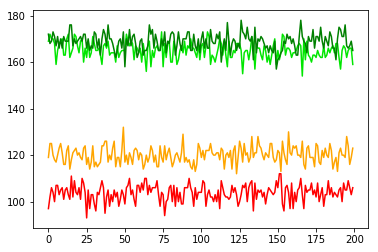

In [6]:
# i = 112542 is a good example
i = np.random.randint(0, 163481)
trace = traces[i]

for i in range(4):
    plt.plot(trace[i], color=colors[i])
    i += 1

## Plot average intensity for each color

In [7]:
avg_trace = np.zeros((4, 200))
for j in range(4):
    avg_trace[j] = np.mean(traces[:][:][j], axis=0)

Text(0,0.5,'Intensity')

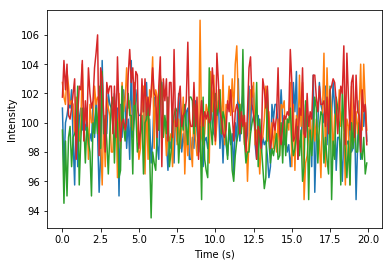

In [11]:
for j in range(4):
    plt.plot(time_axis, avg_trace[j])

plt.xlabel('Time (s)')
plt.ylabel('Intensity')

## Plot intensity distributions

In [12]:
avg_intens = np.mean(traces, axis=2)

Text(0,0.5,'Count')

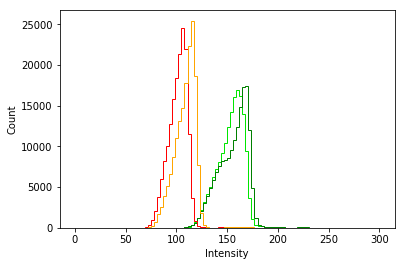

In [17]:
for i in range(4):
    plt.hist(avg_intens.T[i], bins=100, range=[0, 300], histtype='step', color=colors[i])
    
plt.xlabel('Intensity')
plt.ylabel('Count')

404.32907389897156